<a href="https://colab.research.google.com/github/tiaracantiq/gitgithub/blob/main/Data_Mining_with_Python_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect Collab to Gdrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

upload dataset

In [5]:
import pandas as pd

file_path = '/content/drive/My Drive/Praktikum SIAB/Dataset Praktikum7/Mall_Customers.csv'
df = pd.read_csv(file_path, encoding='latin1')

print("Data awal:")
print(df.head())


Data awal:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


persiapan dataset

In [8]:
df = pd.read_csv(file_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
#Checking dataset Structure
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


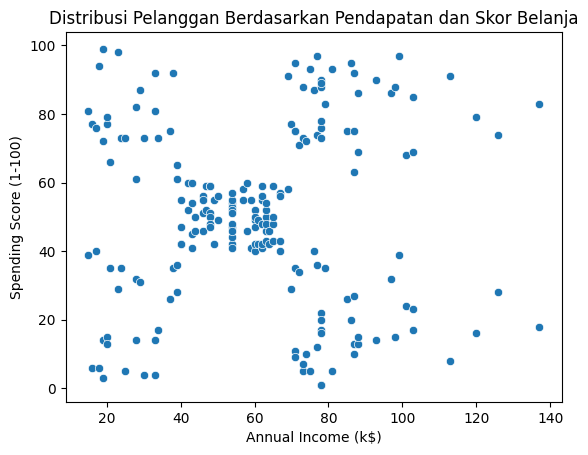

In [12]:
#visualization dataset
sns.scatterplot(
 x='Annual Income (k$)',
 y='Spending Score (1-100)',
 data=df
)
plt.title("Distribusi Pelanggan Berdasarkan Pendapatan dan Skor Belanja")
plt.show()

Preproccessing

In [13]:
#Choose Fitur
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [14]:
#Normalization data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Menentukan Jumlah Cluster

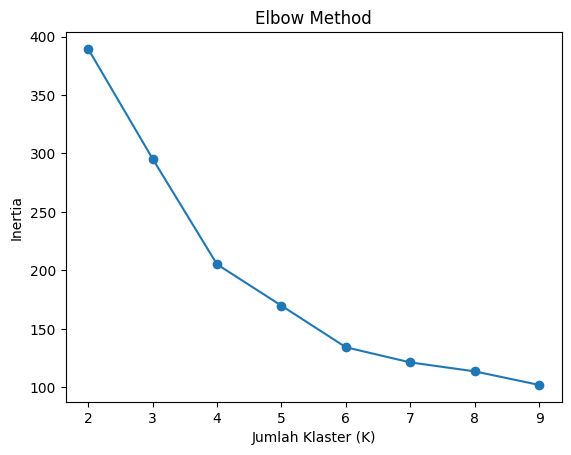

In [15]:
#Elbow Method
inertia = []
for k in range(2, 10):
 kmeans = KMeans(n_clusters=k, random_state=42)
 kmeans.fit(X_scaled)
 inertia.append(kmeans.inertia_)
plt.plot(range(2,10), inertia, marker='o')
plt.xlabel("Jumlah Klaster (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

Membuat Model K-Means

In [16]:
#Proccess Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [17]:
#Evaluation Clustering
score = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.40846873777345605


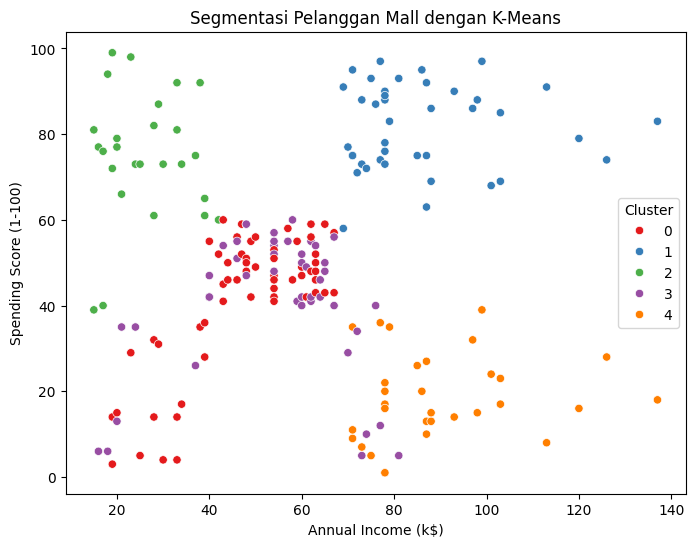

In [18]:
#Visualization  Clustering Result
plt.figure(figsize=(8,6))
sns.scatterplot(
 x='Annual Income (k$)',
 y='Spending Score (1-100)',
 hue='Cluster',
 data=df,
 palette='Set1'
)
plt.title("Segmentasi Pelanggan Mall dengan K-Means")
plt.show()

# Task
Perform K-Means clustering on the `X_scaled` data twice: once with K=3 and once with K=7. For each scenario, calculate and display the Silhouette Score, then add the resulting cluster labels to the original DataFrame `df`. After clustering, visualize both K=3 and K=7 results using scatter plots, showing 'Annual Income (k$)' vs 'Spending Score (1-100)', with points colored by their assigned cluster. Finally, compare the Silhouette Scores from both K=3 and K=7, analyze the differences in cluster density and separation, discuss the business implications (pros and cons) of each number of clusters, and recommend the optimal number of clusters for mall customer segmentation, referencing the previous Elbow Method results.

## K-Means Clustering (K=3)

### Subtask:
Terapkan algoritma K-Means pada data yang telah dinormalisasi (X_scaled) dengan jumlah klaster K=3. Hitung dan tampilkan Silhouette Score untuk hasil clustering ini, lalu tambahkan label klaster ke DataFrame 'df'.


**Reasoning**:
The subtask requires applying K-Means clustering with K=3. First, I will initialize the KMeans model, fit it to the scaled data, and assign the cluster labels to the original DataFrame as a new column. Then, I will calculate and print the Silhouette Score to evaluate the clustering performance.



In [19]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster_K3'] = kmeans_k3.fit_predict(X_scaled)

score_k3 = silhouette_score(X_scaled, df['Cluster_K3'])
print(f"Silhouette Score for K=3: {score_k3}")

Silhouette Score for K=3: 0.357793388710272


**Reasoning**:
The previous subtask of performing K-Means clustering with K=3 has been completed. The next step, according to the main task, is to perform K-Means clustering with K=7. This involves initializing a KMeans model with 7 clusters, fitting it to the scaled data, adding the cluster labels to the DataFrame, and calculating and printing the Silhouette Score.



In [20]:
kmeans_k7 = KMeans(n_clusters=7, random_state=42, n_init=10)
df['Cluster_K7'] = kmeans_k7.fit_predict(X_scaled)

score_k7 = silhouette_score(X_scaled, df['Cluster_K7'])
print(f"Silhouette Score for K=7: {score_k7}")

Silhouette Score for K=7: 0.417231894954916


**Reasoning**:
The next step is to visualize the clustering results for K=3. This involves creating a scatter plot with 'Annual Income (k$)' on the x-axis and 'Spending Score (1-100)' on the y-axis, with points colored according to their 'Cluster_K3' assignments. A clear title and labels are necessary for readability.



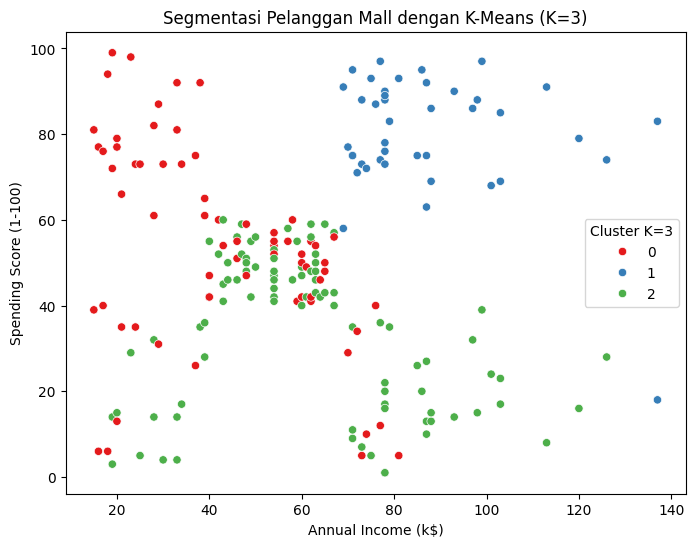

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_K3',
    data=df,
    palette='Set1'
)
plt.title('Segmentasi Pelanggan Mall dengan K-Means (K=3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster K=3')
plt.show()

**Reasoning**:
Following the visualization of K=3 clustering, the next step is to visualize the clustering results for K=7. This involves creating a scatter plot similar to the previous one, but using the 'Cluster_K7' column to color the points.



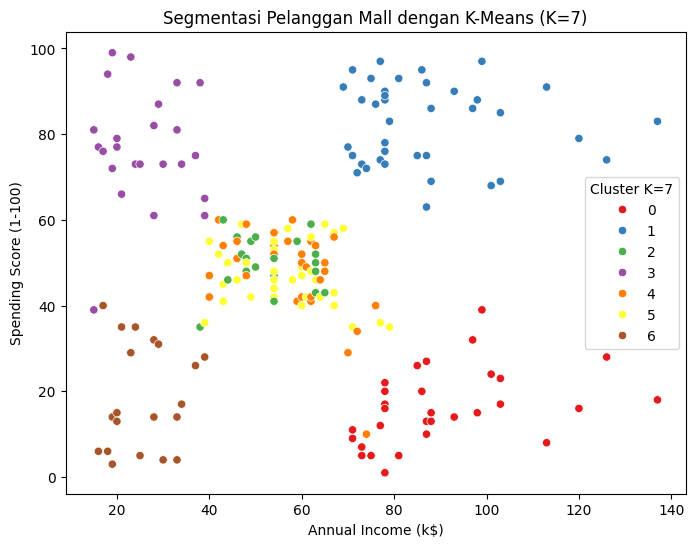

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_K7',
    data=df,
    palette='Set1'
)
plt.title('Segmentasi Pelanggan Mall dengan K-Means (K=7)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster K=7')
plt.show()

## Perbandingan K=3 dan K=7 Clustering

**Silhouette Score:**
- **K=3:** 0.357793388710272
- **K=7:** 0.417231894954916

**Analisis Perbedaan:**

- **K=3:** Dengan 3 klaster, kita melihat segmentasi yang lebih luas. Berdasarkan visualisasi, klaster cenderung lebih besar dan mungkin kurang homogen. Meskipun demikian, ada pemisahan yang jelas antara pelanggan dengan pendapatan rendah/skor belanja rendah, pendapatan tinggi/skor belanja tinggi, dan satu klaster di antaranya. Silhouette Score yang lebih rendah dibandingkan K=7 menunjukkan bahwa klaster-klaster ini memiliki kepadatan yang sedikit lebih rendah atau kurang terpisah dengan baik dibandingkan dengan 7 klaster.

- **K=7:** Dengan 7 klaster, segmentasi menjadi lebih granular. Silhouette Score yang lebih tinggi menunjukkan bahwa klaster-klaster yang terbentuk lebih padat dan lebih terpisah satu sama lain dibandingkan dengan 3 klaster. Visualisasi untuk K=7 mungkin menunjukkan kelompok-kelompok pelanggan yang lebih spesifik, misalnya, membedakan antara pelanggan dengan "pendapatan menengah, skor belanja rendah" dengan "pendapatan menengah, skor belanja menengah" yang mungkin tergabung dalam satu klaster pada K=3.

**Implikasi Bisnis:**

- **K=3:**
  - **Keuntungan:** Lebih mudah diinterpretasikan dan diimplementasikan untuk strategi pemasaran yang lebih umum. Cocok untuk pendekatan yang lebih luas dan tidak memerlukan penargetan yang terlalu spesifik. Lebih sedikit klaster juga berarti sumber daya pemasaran dapat dialokasikan ke kelompok yang lebih besar dengan lebih efisien.
  - **Kerugian:** Mungkin terlalu menyederhanakan perilaku pelanggan, sehingga kehilangan nuansa penting dalam segmentasi. Strategi pemasaran mungkin tidak seoptimal mungkin karena menargetkan kelompok yang beragam dalam satu klaster.

- **K=7:**
  - **Keuntungan:** Memberikan wawasan yang lebih detail tentang berbagai segmen pelanggan. Memungkinkan penargetan pemasaran yang sangat spesifik dan personalisasi kampanye. Ini dapat mengarah pada tingkat konversi yang lebih tinggi dan kepuasan pelanggan yang lebih baik karena pesan lebih relevan.
  - **Kerugian:** Kompleksitas interpretasi dan pengelolaan klaster yang lebih banyak. Membutuhkan sumber daya yang lebih besar untuk mengembangkan dan mengelola strategi pemasaran yang disesuaikan untuk setiap klaster yang lebih kecil. Ada risiko over-segmentation jika perbedaan antar klaster terlalu kecil untuk ditindaklanjuti secara bisnis.

**Rekomendasi Optimalisasi Jumlah Klaster:**

Berdasarkan hasil Elbow Method sebelumnya, kita melihat 'siku' (elbow) yang signifikan pada K=5. Meskipun Silhouette Score untuk K=7 sedikit lebih tinggi, peningkatan dari K=5 ke K=7 tidak signifikan secara drastis, dan Elbow Method menunjukkan K=5 sebagai titik di mana penambahan klaster memberikan pengembalian yang semakin berkurang dalam hal pengurangan inersia.

Mempertimbangkan trade-off antara detail segmentasi (Silhouette Score) dan interpretasi/implementasi (Elbow Method dan kompleksitas):

- K=7 memberikan Silhouette Score terbaik, menunjukkan klaster yang paling jelas dan terpisah.
- K=3 memberikan gambaran yang terlalu umum dan Silhouette Score terendah.
- **K=5** (yang sebelumnya ditentukan optimal dari Elbow Method dan juga digunakan di awal tugas utama ini) kemungkinan merupakan titik keseimbangan yang baik, menawarkan segmentasi yang cukup rinci untuk tindakan bisnis tanpa terlalu kompleks. Silhouette Score untuk K=5 juga cukup baik (0.408), mendekati K=7, tetapi dengan klaster yang lebih sedikit.

**Oleh karena itu, jika harus memilih antara K=3 dan K=7, K=7 menunjukkan segmentasi yang lebih baik secara statistik (berdasarkan Silhouette Score). Namun, jika kita juga mempertimbangkan hasil Elbow Method, K=5 mungkin merupakan pilihan yang lebih seimbang untuk implementasi bisnis praktis.**



## Summary:

### Q&A
**What is the recommended optimal number of clusters for mall customer segmentation?**
While K=7 shows a statistically better Silhouette Score of 0.417 compared to K=3's 0.358, suggesting more distinct and separated clusters, the analysis concludes that K=5 (as indicated by the Elbow Method in previous steps) likely represents a more balanced choice for practical business implementation. K=5 offers sufficient segmentation detail without the added complexity of K=7. If the choice is strictly between K=3 and K=7, then K=7 is statistically superior.

### Data Analysis Key Findings
*   K-Means clustering with K=3 resulted in a Silhouette Score of 0.35779.
*   K-Means clustering with K=7 resulted in a Silhouette Score of 0.41723.
*   The Silhouette Score for K=7 is higher than for K=3, indicating that the clusters formed with K=7 are generally more dense and better separated.
*   Clustering with K=3 provides broader, more easily interpretable segments, suitable for general marketing strategies, but risks oversimplification.
*   Clustering with K=7 offers more granular customer insights, enabling highly specific and personalized marketing, but increases complexity in interpretation and management.

### Insights or Next Steps
*   For practical business implementation, considering the trade-off between segmentation detail and operational complexity, K=5 (as suggested by the Elbow Method) appears to be a good balance, offering enough granularity without being overly complex to manage.
*   Further analysis could involve exploring the characteristics of each of the recommended K=5 clusters to develop targeted marketing strategies.
